In [70]:
import os
import datetime
import math
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
import ctypes

os.chdir("../data")

In [71]:
def load_ephemeris(filepath):
    """Load HORIZONS ephemeris data into pandas dataframe"""

    #Read in ephemeris file
    with open(filepath, "r") as ephemeris:
        lines = ephemeris.readlines()

    #Get line number with start and end of ephemeris symbol
    start = [i for i,line in enumerate(lines) if "$$SOE" in line][0]
    end = [i for i,line in enumerate(lines) if "$$EOE" in line][0]

    # Get column names as two lines before start of ephemeris data
    columns = lines[start-2].split(",")
    columns = [name.strip() for name in columns]
    columns

    # Read the lines between start and end of ephemeris symbols
    # use identified columns as column names
    ephemeris = pd.read_csv(filepath, skiprows=start+1, skipfooter=len(lines)-end, header=None, names=columns, engine="python")
    
    return ephemeris

In [72]:
def get_body_name(filepath):
    """Get the name of target body from file header"""
    with open("ephemeris/"+filepath, "r") as f:
        body = f.readlines()[3]
    body = body.split(" ")[3]
    return body

In [110]:
innerMoons = ["Amalthea","Thebe","Adrastea","Metis"]
galileanMoons = ["Io", "Europa", "Ganymede", "Callisto"]

## Load files

In [73]:
ephemeris_file_names = os.listdir('ephemeris')
ephemeris_files = [load_ephemeris("ephemeris/"+f) for f in ephemeris_file_names]

In [74]:
# Format the date column
for ephemeris in ephemeris_files:
    ephemeris['Calendar Date (TDB)'] = ephemeris['Calendar Date (TDB)'].str.replace("A.D. ", "")
    ephemeris['Calendar Date (TDB)'] = pd.to_datetime(ephemeris['Calendar Date (TDB)'])

In [75]:
# # Filter data based on current datetime and specified timewindow
# t = datetime.datetime.now()
# # t = pd.to_datetime("2021-05-25 00:00:01")
# time_dif = datetime.timedelta(hours=12)

# ephemeris_files = [df[(df['Calendar Date (TDB)']<t) & (df['Calendar Date (TDB)']>(t-time_dif))] for df in ephemeris_files]

In [76]:
ephemeris_files

[       JDTDB Calendar Date (TDB)         X         Y         Z        VX  \
 0  2459351.5          2021-05-17  0.090988 -0.060800 -0.066679 -0.000884   
 1  2459352.5          2021-05-18  0.090098 -0.061966 -0.067349 -0.000897   
 2  2459353.5          2021-05-19  0.089196 -0.063126 -0.068010 -0.000908   
 3  2459354.5          2021-05-20  0.088282 -0.064277 -0.068663 -0.000920   
 4  2459355.5          2021-05-21  0.087356 -0.065420 -0.069307 -0.000931   
 5  2459356.5          2021-05-22  0.086420 -0.066555 -0.069942 -0.000942   
 6  2459357.5          2021-05-23  0.085473 -0.067683 -0.070568 -0.000952   
 7  2459358.5          2021-05-24  0.084516 -0.068802 -0.071185 -0.000962   
 
          VY        VZ        LT        RG        RR      
 0 -0.001171 -0.000675  0.000740  0.128146  0.000280 NaN  
 1 -0.001163 -0.000666  0.000742  0.128426  0.000281 NaN  
 2 -0.001155 -0.000657  0.000743  0.128709  0.000285 NaN  
 3 -0.001147 -0.000648  0.000745  0.128995  0.000287 NaN  
 4 -0.0011

## Get body names

In [106]:
bodynames = [get_body_name(f) for f in ephemeris_file_names]
bodynames

['Isonoe',
 'Leda',
 'Praxidike',
 'Autonoe',
 '2003J19',
 'Thyone',
 'Hermippe',
 '2003J23',
 'Aitne',
 '2011J1',
 'Eurydome',
 'Euanthe',
 '2011J2',
 'Euporie',
 'Orthosie',
 'Callirrhoe',
 'Sponde',
 'Io',
 'Kale',
 'Europa',
 'Pasithee',
 'Ganymede',
 'Hegemone',
 'Callisto',
 'Mneme',
 'Amalthea',
 'Aoede',
 'Thebe',
 'Adrastea',
 'Thelxinoe',
 'Metis',
 'Arche',
 'Himalia',
 'Kallichore',
 'Helike',
 'Elara',
 'Themisto',
 'Pasiphae',
 'Carpo',
 'Sinope',
 'Eukelade',
 'Cyllene',
 'Kore',
 'Herse',
 'Lysithea',
 '2010J1',
 '2010J2',
 'Dia',
 '2003J2',
 'Eupheme',
 '2003J4',
 'Eirene',
 '2003J9',
 'Carme',
 '2003J10',
 '2003J12',
 'Ananke',
 'Philophrosyne',
 'Megaclite',
 'Taygete',
 'Chaldene',
 '2003J16',
 'Harpalyke',
 'Kalyke',
 'Iocaste',
 'Erinome',
 '2003J18']

## Make figure

In [107]:
hsv_to_rgb((0.2,1,1))

array([0.8, 1. , 0. ])

In [118]:
def neon_plot(x, y, n_lines=5, colour="#83fdff"):
#     n_lines = 5
    for i in range(1,n_lines):
        plt.plot(x, y, c=colour,
                 linewidth=10*i,
                 alpha=0.03,
                 solid_capstyle="round")

    plt.plot(x, y, c=colour, solid_capstyle="round")
#     plt.plot(x, y, c="white", linewidth=0.5)
    plt.scatter(x.iloc[-1], y.iloc[-1], c=colour)

In [121]:
def neon_point(x, y, n_lines=5, colour="#83fdff"):
#     colour = "#83fdff"
#     n_lines = 5
    for i in range(1,n_lines):
        plt.scatter(x.iloc[-1], y.iloc[-1], c=colour,
                 s=100*i,
                 alpha=0.03,
                 zorder=5
                )
    plt.scatter(x.iloc[-1], y.iloc[-1], c=colour)

Text(0, 0.5, '2021-May-24')

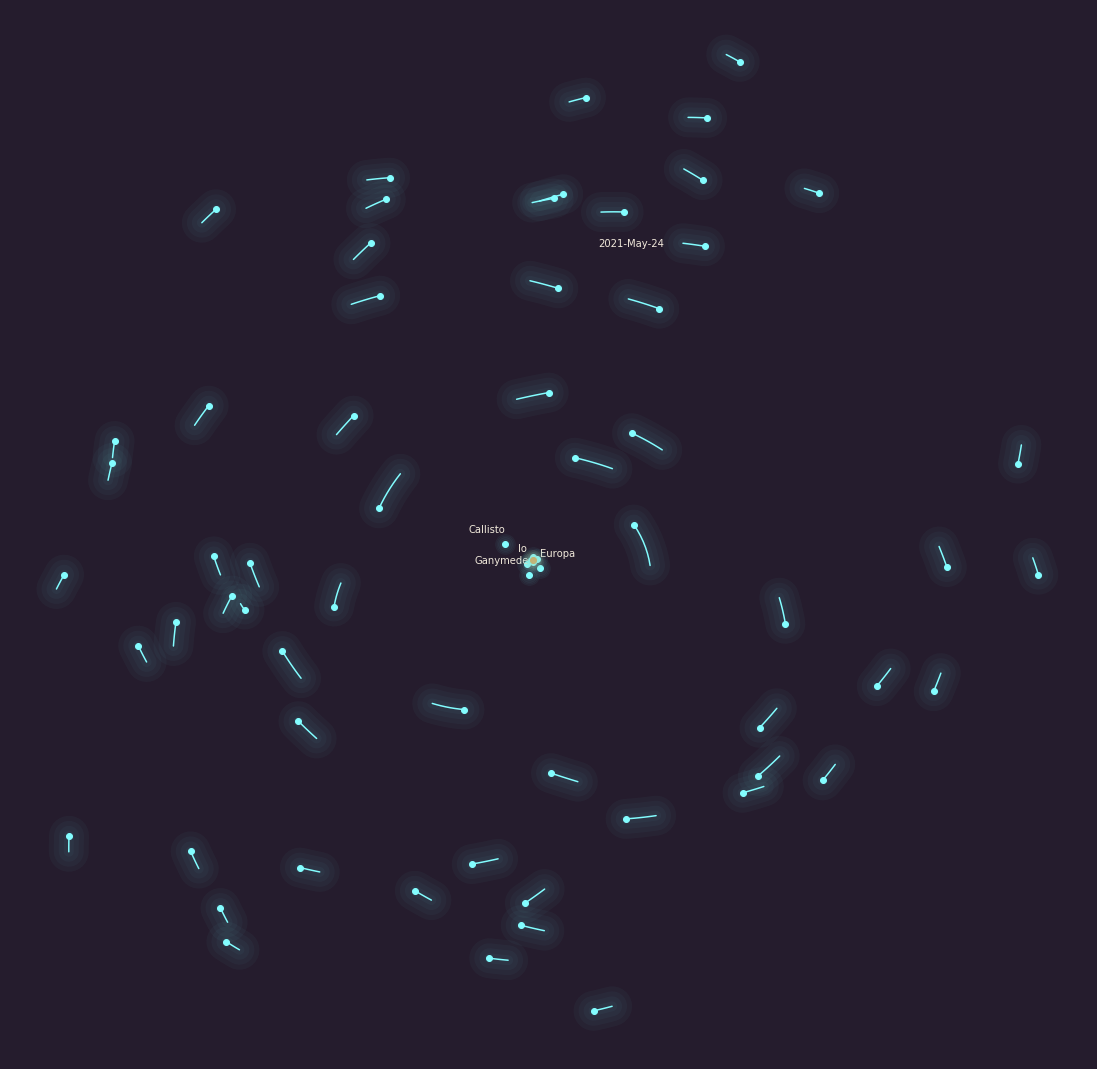

In [212]:
fig = plt.figure(figsize=(30,30))
fig.patch.set_facecolor("#251c2d")

gs = fig.add_gridspec(nrows=3, ncols=3)
ax = []

ax.append(fig.add_subplot(gs[0:2, 0:2]))
ax[-1].axis('off')

for df,name in zip(ephemeris_files, bodynames):
    if name in innerMoons:
#         pass
        neon_point(df.X, df.Y)
    elif name in galileanMoons:
#         pass
        neon_point(df.X, df.Y)
        if df.X.iloc[-1]>0:
            plt.text(df.X.iloc[-1], df.Y.iloc[-1]+0.005, 
                     name, horizontalalignment="left",
                     color="#f0e8da", fontsize=10)
        else:
            plt.text(df.X.iloc[-1], df.Y.iloc[-1]+0.005, 
                     name, horizontalalignment="right",
                     color="#f0e8da", fontsize=10)
    else:
#         pass
        neon_plot(df.X, df.Y)

#Plot central body
# plt.scatter(0,0, c="#fd8f24", s=50, zorder=10)
neon_point(pd.Series(0), pd.Series(0), colour="#fd8f24")


# ax.append(fig.add_subplot(gs[2, 2]))
# ax[-1].scatter(range(5),range(5))

ax.append(fig.add_subplot(gs[0, 1]))
ax[-1].axis('off')
lastdate = df['Calendar Date (TDB)'].dt.strftime('%Y-%b-%d').iloc[-1]
ax[-1].text(0,0.5, lastdate, color="#f0e8da",
           fontsize=10,# **font
           )

Text(0, 0.5, '2021-May-24')

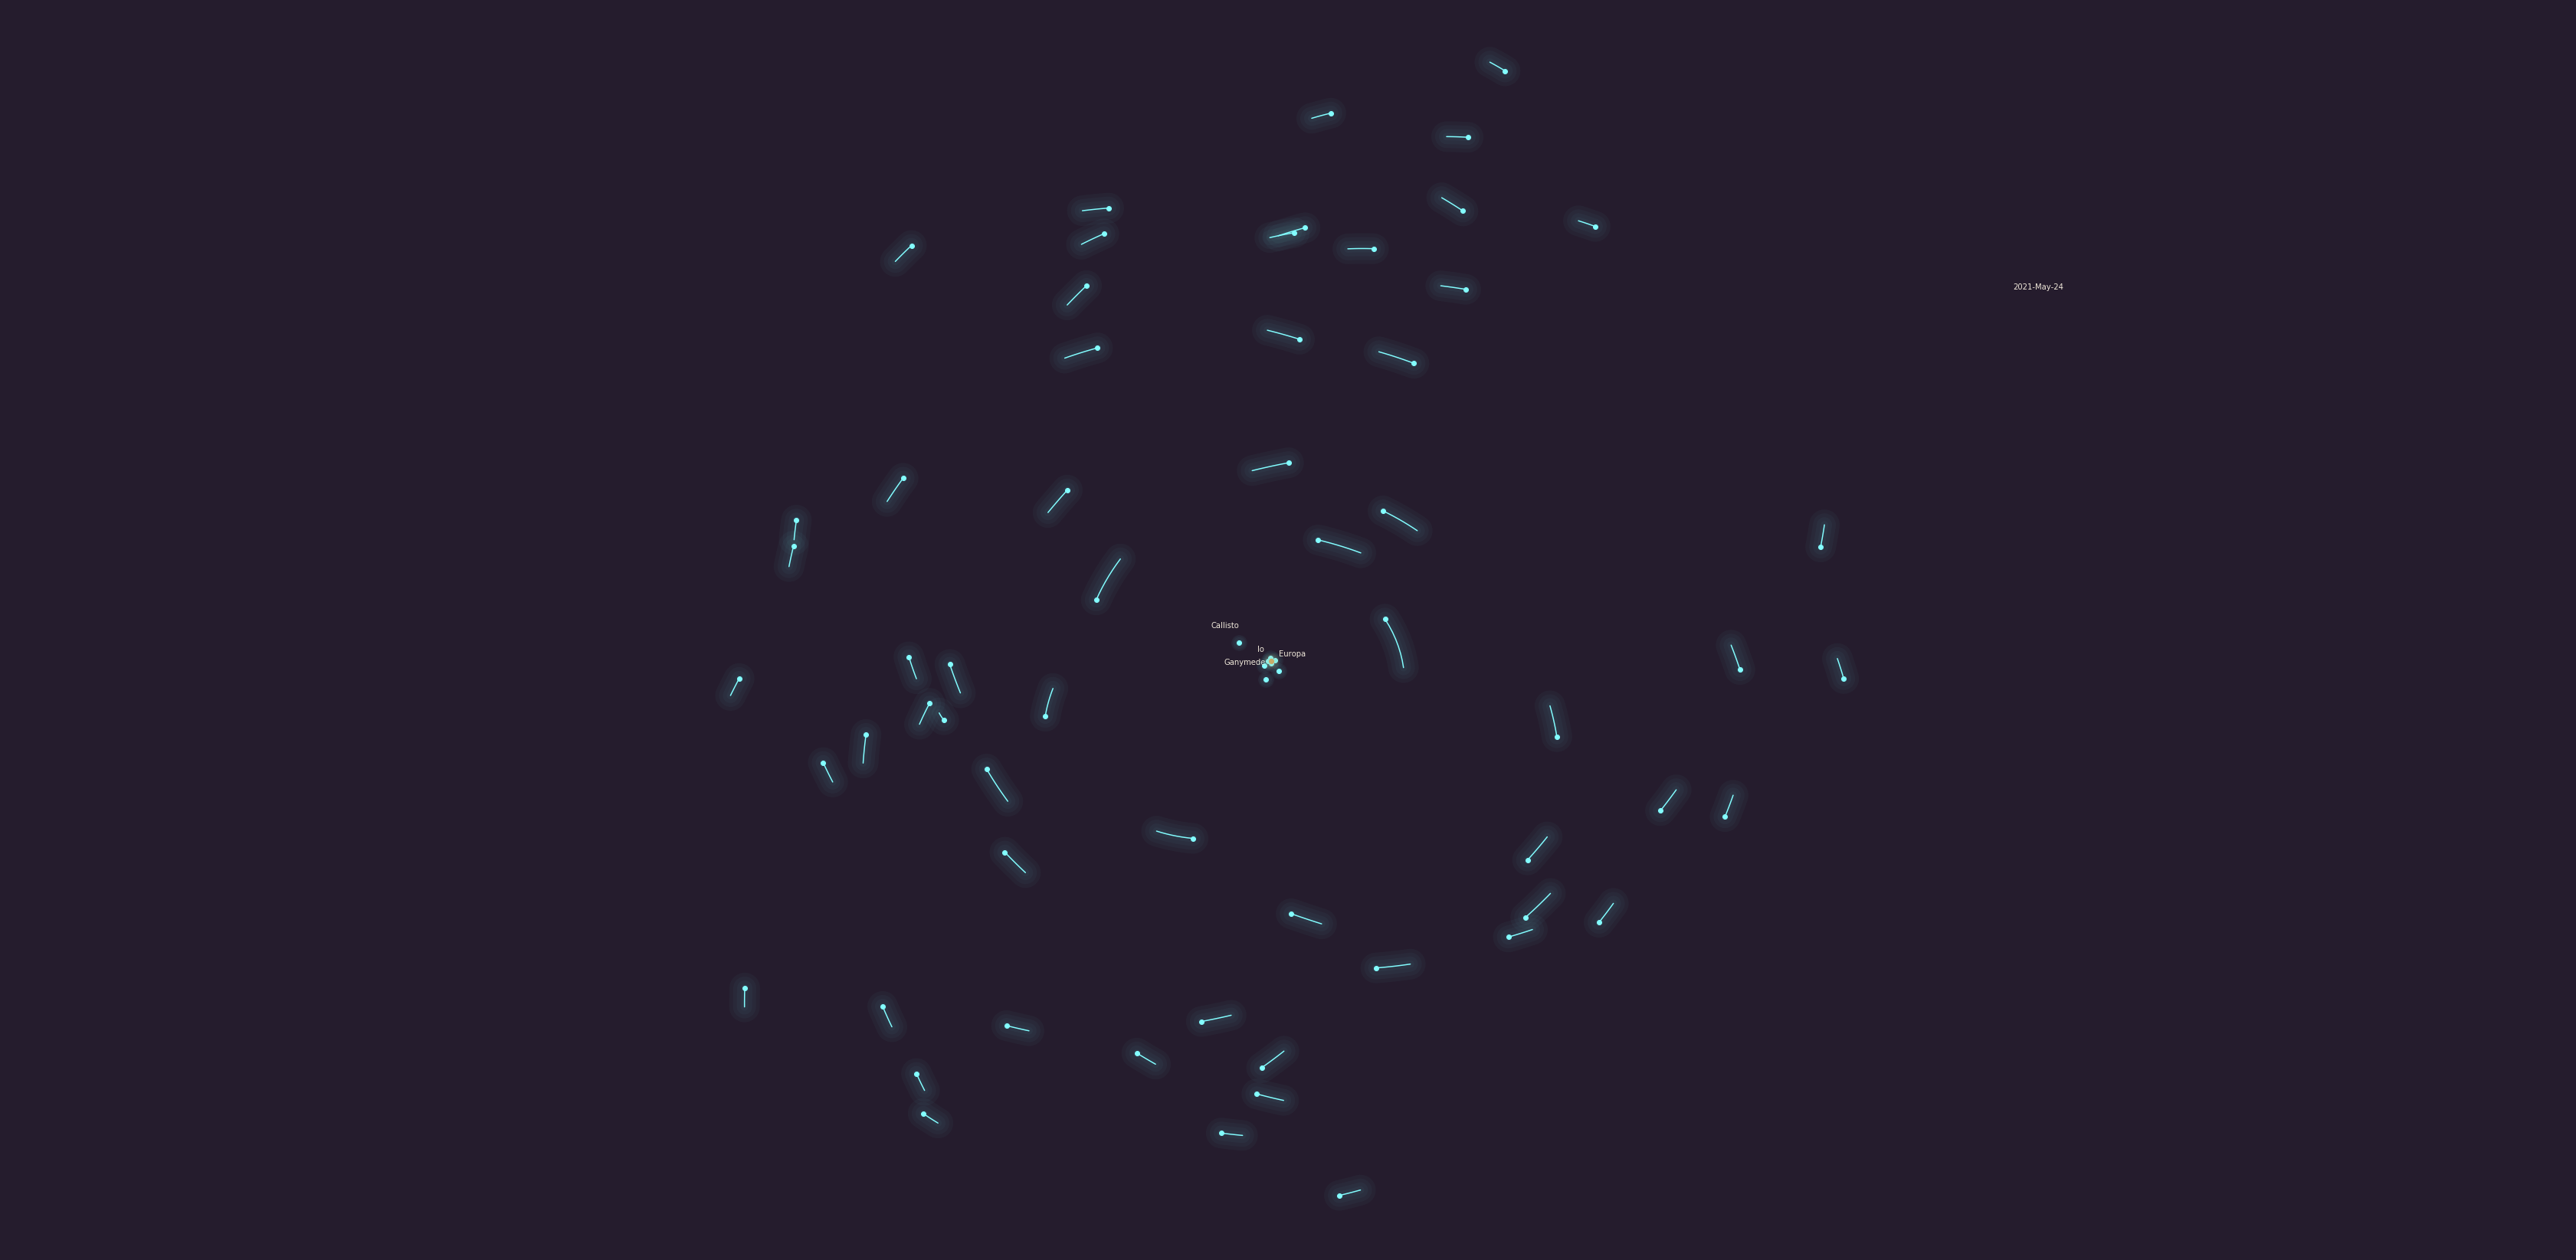

In [211]:
fig = plt.figure(figsize=(60,30))
fig.patch.set_facecolor("#251c2d")

gs = fig.add_gridspec(nrows=2, ncols=4)
ax = []

ax.append(fig.add_subplot(gs[0, 0]))
ax[-1].axis('off')

ax.append(fig.add_subplot(gs[0:2, 1:3]))
ax[-1].axis('off')

for df,name in zip(ephemeris_files, bodynames):
    if name in innerMoons:
#         pass
        neon_point(df.X, df.Y)
    elif name in galileanMoons:
#         pass
        neon_point(df.X, df.Y)
        if df.X.iloc[-1]>0:
            plt.text(df.X.iloc[-1], df.Y.iloc[-1]+0.005, 
                     name, horizontalalignment="left",
                     color="#f0e8da", fontsize=10)
        else:
            plt.text(df.X.iloc[-1], df.Y.iloc[-1]+0.005, 
                     name, horizontalalignment="right",
                     color="#f0e8da", fontsize=10)
    else:
#         pass
        neon_plot(df.X, df.Y)

#Plot central body
# plt.scatter(0,0, c="#fd8f24", s=50, zorder=10)
neon_point(pd.Series(0), pd.Series(0), colour="#fd8f24")


# ax.append(fig.add_subplot(gs[2, 2]))
# ax[-1].scatter(range(5),range(5))

ax.append(fig.add_subplot(gs[0, 3]))
ax[-1].axis('off')
lastdate = df['Calendar Date (TDB)'].dt.strftime('%Y-%b-%d').iloc[-1]
ax[-1].text(0,0.5, lastdate, color="#f0e8da",
           fontsize=10,# **font
           )

# To do
- smooth with `gaussian_filter1d`?
- output to figure for background
- put large empty spaces on either side